In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
import regex as re

In [25]:
energy_data = pd.read_csv("Building_Energy_Benchmarking.csv")
display(energy_data.shape) #displays the shape of the dataframe
display(energy_data.columns) #displays the columns of the dataframe

missing_data = 100 * energy_data.isnull().sum()/len(energy_data)
print(missing_data) #the percentage of missing data in each column

(494, 31)

Index(['Property Id', 'Property Name', 'Address 1', 'City', 'Postal Code',
       'Province', 'Primary Property Type - Self Selected',
       'Number of Buildings', 'Year Built',
       'Property GFA - Self-Reported (m²)', 'ENERGY STAR Score',
       'Site Energy Use (GJ)', 'Weather Normalized Site Energy Use (GJ)',
       'Site EUI (GJ/m²)', 'Weather Normalized Site EUI (GJ/m²)',
       'Source Energy Use (GJ)', 'Weather Normalized Source Energy Use (GJ)',
       'Source EUI (GJ/m²)', 'Weather Normalized Source EUI (GJ/m²)',
       'Total GHG Emissions (Metric Tons CO2e)',
       'Total GHG Emissions Intensity (kgCO2e/m²)',
       'Direct GHG Emissions (Metric Tons CO2e)',
       'Direct GHG Emissions Intensity (kgCO2e/m²)',
       'Electricity Use - Grid Purchase (kWh)', 'Natural Gas Use (GJ)',
       'District Hot Water Use (GJ)',
       'Electricity Use – Generated from Onsite Renewable Systems (kWh)',
       'Green Power - Onsite and Offsite (kWh)',
       'Avoided Emissions - Ons

Property Id                                                               0.000000
Property Name                                                             0.000000
Address 1                                                                 0.000000
City                                                                      0.000000
Postal Code                                                               0.000000
Province                                                                  0.000000
Primary Property Type - Self Selected                                     0.000000
Number of Buildings                                                       0.000000
Year Built                                                                0.000000
Property GFA - Self-Reported (m²)                                         0.000000
ENERGY STAR Score                                                        66.599190
Site Energy Use (GJ)                                                      0.000000
Weat

In [27]:
#dropping all columns with more than 40% missing values 
clean_energy_data = energy_data.drop(['ENERGY STAR Score','District Hot Water Use (GJ)','Electricity Use – Generated from Onsite Renewable Systems (kWh)','Green Power - Onsite and Offsite (kWh)', 'Avoided Emissions - Onsite and Offsite Green Power (Metric Tons CO2e)'],axis = 1)
display(clean_energy_data.head())

# Inputs missing data in numerical columns using the median value and in categorical columns using the mode 
energy_data_filled = clean_energy_data.fillna({
    'Weather Normalized Source Energy Use (GJ)': clean_energy_data['Weather Normalized Source Energy Use (GJ)'].mode(),
    'Natural Gas Use (GJ)': clean_energy_data['Natural Gas Use (GJ)'].mode()
}) 
display(energy_data_filled.dtypes)


#Using Regex to extract numeric values from text based numeric columns 

energy_data_filled[['Property GFA - Self-Reported (m²)','Site Energy Use (GJ)','Weather Normalized Site Energy Use (GJ)','Source Energy Use (GJ)','Total GHG Emissions (Metric Tons CO2e)','Direct GHG Emissions (Metric Tons CO2e)','Electricity Use - Grid Purchase (kWh)','Natural Gas Use (GJ)']] = energy_data_filled[['Property GFA - Self-Reported (m²)','Site Energy Use (GJ)','Weather Normalized Site Energy Use (GJ)','Source Energy Use (GJ)','Total GHG Emissions (Metric Tons CO2e)','Direct GHG Emissions (Metric Tons CO2e)','Electricity Use - Grid Purchase (kWh)','Natural Gas Use (GJ)']].apply(lambda x: x.str.replace(',|-','',regex = True))
display(energy_data_filled['Property GFA - Self-Reported (m²)'][101:120])

,Property Id,Property Name,Address 1,City,Postal Code,Province,Primary Property Type - Self Selected,Number of Buildings,Year Built,Property GFA - Self-Reported (m²),...,Source EUI (GJ/m²),Weather Normalized Source EUI (GJ/m²),Total GHG Emissions (Metric Tons CO2e),Total GHG Emissions Intensity (kgCO2e/m²),Direct GHG Emissions (Metric Tons CO2e),Direct GHG Emissions Intensity (kgCO2e/m²),Electricity Use - Grid Purchase (kWh),Natural Gas Use (GJ),Year Ending,Unique ID
0,10176804,Acadia Aquatic & Fitness Centre,9009 Fairmount Dr SE,Calgary,T2H 0Z4,Alberta,Heated Swimming Pool,1,2010,1838,...,4.47,4.91,509,276.7,280,152.4,368616,5453,2023,2023-10176804
1,6169481,Ad Valorem,2924 11 ST NE,Calgary,t2e7l7,Alberta,Office,1,1981,7770,...,1.57,1.64,920,118.4,243,31.2,1091854,4725,2023,2023-6169481
2,6305956,Alberta Trade Centre,315 10 AV SE,Calgary,T2G 0W2,Alberta,Office,1,1974,6681,...,0.94,1.00,499,74.6,0,0.0,508589,3,2023,2023-6305956
3,8854296,Andrew Davison,133 6 AV SE,Calgary,T2G0G2,Alberta,Office,1,1979,17468,...,0.97,1.04,1293,74.0,26,1.5,1152308,506,2023,2023-8854296
4,21988603,Animal Services Centre,2201 PORTLAND ST SE,Calgary,T2G 4M7,Alberta,Office,1,2000,2143,...,4.00,4.27,568,265.2,253,118.1,508594,4926,2023,2023-21988603


Property Id                                     int64
Property Name                                  object
Address 1                                      object
City                                           object
Postal Code                                    object
Province                                       object
Primary Property Type - Self Selected          object
Number of Buildings                             int64
Year Built                                      int64
Property GFA - Self-Reported (m²)              object
Site Energy Use (GJ)                           object
Weather Normalized Site Energy Use (GJ)        object
Site EUI (GJ/m²)                              float64
Weather Normalized Site EUI (GJ/m²)           float64
Source Energy Use (GJ)                         object
Weather Normalized Source Energy Use (GJ)      object
Source EUI (GJ/m²)                            float64
Weather Normalized Source EUI (GJ/m²)         float64
Total GHG Emissions (Metric 

101    5260.10
102    2185.50
103       3145
104    1953.10
105    1462.80
106    2892.90
107    2034.80
108    1549.80
109    1189.50
110    9891.10
111       3762
112      229.5
113       2072
114        922
115       2391
116    4761.50
117      22684
118    1508.10
119    3783.30
Name: Property GFA - Self-Reported (m²), dtype: object

In [29]:
#Changing the data types of relevant columns to numeric types
energy_data_filled = energy_data_filled.astype({'Property GFA - Self-Reported (m²)':'Float64','Site Energy Use (GJ)':'Float64','Weather Normalized Site Energy Use (GJ)':'Float64','Source Energy Use (GJ)':'Float64','Total GHG Emissions (Metric Tons CO2e)':'Float64','Direct GHG Emissions (Metric Tons CO2e)':'Float64','Electricity Use - Grid Purchase (kWh)':'Float64','Natural Gas Use (GJ)':'Float64','Year Ending':'Int64'})
display(energy_data_filled.dtypes)

Property Id                                     int64
Property Name                                  object
Address 1                                      object
City                                           object
Postal Code                                    object
Province                                       object
Primary Property Type - Self Selected          object
Number of Buildings                             int64
Year Built                                      int64
Property GFA - Self-Reported (m²)             Float64
Site Energy Use (GJ)                          Float64
Weather Normalized Site Energy Use (GJ)       Float64
Site EUI (GJ/m²)                              float64
Weather Normalized Site EUI (GJ/m²)           float64
Source Energy Use (GJ)                        Float64
Weather Normalized Source Energy Use (GJ)      object
Source EUI (GJ/m²)                            float64
Weather Normalized Source EUI (GJ/m²)         float64
Total GHG Emissions (Metric 

In [31]:
energy_data_filled.describe()

,Property Id,Number of Buildings,Year Built,Property GFA - Self-Reported (m²),Site Energy Use (GJ),Weather Normalized Site Energy Use (GJ),Site EUI (GJ/m²),Weather Normalized Site EUI (GJ/m²),Source Energy Use (GJ),Source EUI (GJ/m²),Weather Normalized Source EUI (GJ/m²),Total GHG Emissions (Metric Tons CO2e),Total GHG Emissions Intensity (kgCO2e/m²),Direct GHG Emissions (Metric Tons CO2e),Direct GHG Emissions Intensity (kgCO2e/m²),Electricity Use - Grid Purchase (kWh),Natural Gas Use (GJ),Year Ending
count,4.940000e+02,494.000000,494.000000,494.0,494.0,494.0,494.000000,494.000000,494.0,494.000000,494.000000,494.0,494.000000,494.0,494.000000,494.0,484.0,494.0
mean,1.308877e+07,1.060729,1980.091093,4752.556883,8265.67004,8397.193117,1.774798,1.810324,10590.527733,2.282753,2.319717,724.276316,158.671660,281.868826,63.821862,601102.7917,5602.324587,2020.995951
std,5.659556e+06,0.278281,25.159568,10128.320688,19733.748811,19877.336939,1.306700,1.331529,23438.866328,1.597846,1.622897,1490.433401,109.472637,884.613506,56.835735,1184413.926189,17386.305028,1.414208
min,6.169481e+06,1.000000,1896.000000,113.0,141.0,146.0,0.060000,0.060000,237.0,0.110000,0.110000,15.0,10.200000,0.0,0.000000,10765.8,3.0,2019.0
25%,9.563763e+06,1.000000,1970.000000,1096.65,1232.825,1256.15,0.990000,1.000000,1601.525,1.312500,1.350000,113.85,93.100000,43.0,33.325000,107444.55,851.45,2020.0
50%,9.997794e+06,1.000000,1978.000000,1806.75,2555.65,2572.5,1.290000,1.310000,3238.6,1.680000,1.690000,228.4,117.600000,78.7,43.900000,223771.9,1569.75,2021.0
75%,2.198860e+07,1.000000,1996.000000,4257.9,7999.05,8006.575,2.065000,2.110000,10242.4,2.622500,2.652500,696.55,186.975000,247.425,74.050000,549272.5,4943.375,2022.0
max,2.198863e+07,3.000000,2018.000000,85941.0,243202.0,242611.0,8.430000,8.360000,261481.0,10.130000,10.060000,13067.0,666.200000,12243.0,386.000000,9786193.4,238415.0,2023.0


In [33]:
#Using Regex to standardize the postal codes 
formatted_data = energy_data_filled['Postal Code'].apply(lambda x : (f"{x[:3]} {x[3:]}" if len(x) == 6 else x).upper())
postal_data = formatted_data.apply(lambda x: re.sub(r'[O]','0',x))
display(postal_data[:20])


0     T2H 0Z4
1     T2E 7L7
2     T2G 0W2
3     T2G 0G2
4     T2G 4M7
5     T2N 2H8
6     T2R 0G9
7     T2A 0K9
8     T3B 0B9
9     T2G 0K7
10    T2C 4E1
11    T2W 6G3
12    T2E 8L9
13    T2B 3E2
14    T2G 1W5
15    T2B 0M5
16    T2E 6R2
17    T3B 0B9
18    T2G 2N9
19    T2E 5R1
Name: Postal Code, dtype: object

In [37]:
#Using Regex to extract meaningful text from the Addresses and Property Names Columns
energy_data_filled['Address 1'] = energy_data_filled['Address 1'].str.replace(r'[^\w\s]|Calgary|Alberta|AB','',regex = True)
energy_data_filled['Property Name'] = energy_data_filled['Property Name'].str.replace(r'[^\w\s]','',regex = True)

#energy_data_filled[['Address 1','Property Name']]


In [41]:
#grouping the data by property type and the averages 
property_data = energy_data_filled.groupby('Primary Property Type - Self Selected')[['Site EUI (GJ/m²)','Weather Normalized Site EUI (GJ/m²)','Source EUI (GJ/m²)','Weather Normalized Source EUI (GJ/m²)']].mean()
#display(property_data)

In [28]:
#grouping the data by years and the total ghg emissions by each year
emissions_by_year = energy_data_filled.groupby('Year Ending')['Total GHG Emissions (Metric Tons CO2e)'].sum()
display(emissions_by_year)

Year Ending
2019    75605.4
2020    66617.2
2021    68136.9
2022    72301.0
2023    75132.0
Name: Total GHG Emissions (Metric Tons CO2e), dtype: Float64

In [43]:
#grouping the data by property name and the total energy use by each property
#Sorts the data into the top 10 properties using the most amount of energy
total_energy = energy_data_filled.groupby('Property Name')['Site Energy Use (GJ)'].sum().sort_values(ascending = False)
display(total_energy)

Property Name
Stoney Transit Facility                               726554.8
Municipal Complex                                     406124.1
Village Square Leisure Centre                         396268.1
Southland Leisure Centre                              245215.1
Foothills Aquatic Centre and Bauer and Bush Arenas    122386.6
                                                        ...   
EMS 5                                                   1710.6
Fire Station 36                                         1663.6
Sarcee Salt Storage Building                            1483.5
McHugh House                                            1140.2
Lakeview Clubhouse                                       770.4
Name: Site Energy Use (GJ), Length: 99, dtype: Float64

In [45]:
#dataframe containing the grouped data of the property type and the median value of the total emission by each property type
emissions_by_property = pd.DataFrame(energy_data_filled.groupby('Primary Property Type - Self Selected')['Total GHG Emissions (Metric Tons CO2e)'].median())
#display(emissions_by_property)

#a merged dataframe of the filled dataset and the grouped emission dataframe
emissions_merged = pd.merge(energy_data_filled,emissions_by_property,on = "Primary Property Type - Self Selected")
#display(emissions_merged.head())

#renaming columns in the merged dataset
new_emissions_merged = emissions_merged.rename(columns = {"Total GHG Emissions (Metric Tons CO2e)_x":"Total GHG Emissions (Metric Tons CO2e)","Total GHG Emissions (Metric Tons CO2e)_y":"Total GHG Emissions (Metric Tons CO2e)_Average"})
#display(new_emissions_merged.head())

#Using the IQR method to find outliers in the total emissions column of the dataset
Q1 = energy_data_filled['Total GHG Emissions (Metric Tons CO2e)'].quantile(0.25) #first quantile
Q3 = energy_data_filled['Total GHG Emissions (Metric Tons CO2e)'].quantile(0.75) #third quantile
IQR = Q3 - Q1

print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")

# Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

# Identify outliers
outliers = energy_data_filled[(energy_data_filled['Total GHG Emissions (Metric Tons CO2e)'] < lower_bound) | (energy_data_filled['Total GHG Emissions (Metric Tons CO2e)'] > upper_bound)]
print(f"Number of outliers in Fare: {outliers.shape[0]}")


energy_data_filled.loc[(energy_data_filled['Total GHG Emissions (Metric Tons CO2e)'] < lower_bound) | (energy_data_filled['Total GHG Emissions (Metric Tons CO2e)'] > upper_bound),'Total GHG Emissions (Metric Tons CO2e)'] = new_emissions_merged['Total GHG Emissions (Metric Tons CO2e)_Average']

display(energy_data_filled.head())

Q1: 113.85
Q3: 696.55
IQR: 582.6999999999999
Lower Bound: -760.1999999999999
Upper Bound: 1570.6
Number of outliers in Fare: 46


,Property Id,Property Name,Address 1,City,Postal Code,Province,Primary Property Type - Self Selected,Number of Buildings,Year Built,Property GFA - Self-Reported (m²),...,Source EUI (GJ/m²),Weather Normalized Source EUI (GJ/m²),Total GHG Emissions (Metric Tons CO2e),Total GHG Emissions Intensity (kgCO2e/m²),Direct GHG Emissions (Metric Tons CO2e),Direct GHG Emissions Intensity (kgCO2e/m²),Electricity Use - Grid Purchase (kWh),Natural Gas Use (GJ),Year Ending,Unique ID
0,10176804,Acadia Aquatic Fitness Centre,9009 Fairmount Dr SE,Calgary,T2H 0Z4,Alberta,Heated Swimming Pool,1,2010,1838.0,...,4.47,4.91,509.0,276.7,280.0,152.4,368616.0,5453.0,2023,2023-10176804
1,6169481,Ad Valorem,2924 11 ST NE,Calgary,t2e7l7,Alberta,Office,1,1981,7770.0,...,1.57,1.64,920.0,118.4,243.0,31.2,1091854.0,4725.0,2023,2023-6169481
2,6305956,Alberta Trade Centre,315 10 AV SE,Calgary,T2G 0W2,Alberta,Office,1,1974,6681.0,...,0.94,1.00,499.0,74.6,0.0,0.0,508589.0,3.0,2023,2023-6305956
3,8854296,Andrew Davison,133 6 AV SE,Calgary,T2G0G2,Alberta,Office,1,1979,17468.0,...,0.97,1.04,1293.0,74.0,26.0,1.5,1152308.0,506.0,2023,2023-8854296
4,21988603,Animal Services Centre,2201 PORTLAND ST SE,Calgary,T2G 4M7,Alberta,Office,1,2000,2143.0,...,4.00,4.27,568.0,265.2,253.0,118.1,508594.0,4926.0,2023,2023-21988603


,Site EUI (GJ/m²)
Year Ending,
2019,1.981313
2020,1.696869
2021,1.681515
2022,1.781616
2023,1.732245


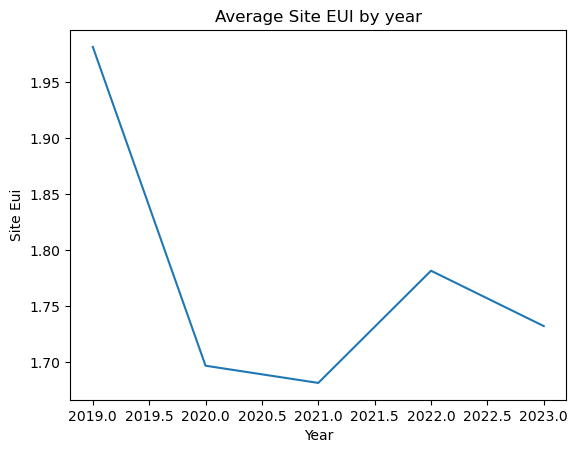

In [47]:
#dataframe containing the grouped data of the years and the average site EUI by year
eui_by_year = pd.DataFrame(energy_data_filled.groupby('Year Ending')['Site EUI (GJ/m²)'].mean())
display(eui_by_year)

#line plot of the year and the average site EUI
x = eui_by_year.index
y = eui_by_year['Site EUI (GJ/m²)']

plt.plot(x,y)
plt.xlabel('Year')
plt.ylabel('Site Eui')
plt.title('Average Site EUI by year')
plt.show()

,Total GHG Emissions (Metric Tons CO2e)
Property Name,
Stoney Transit Facility,38841.0
Calgary Soccer Centre and Annex,6866.4
Water Centre,6473.9
Andrew Davison,6045.8
Jimmie Condon and Rose Kohn Arenas,5498.4
...,...
Georgina Thompson Building,223.9
Fire Station 36,144.2
Lakeview Clubhouse,140.2


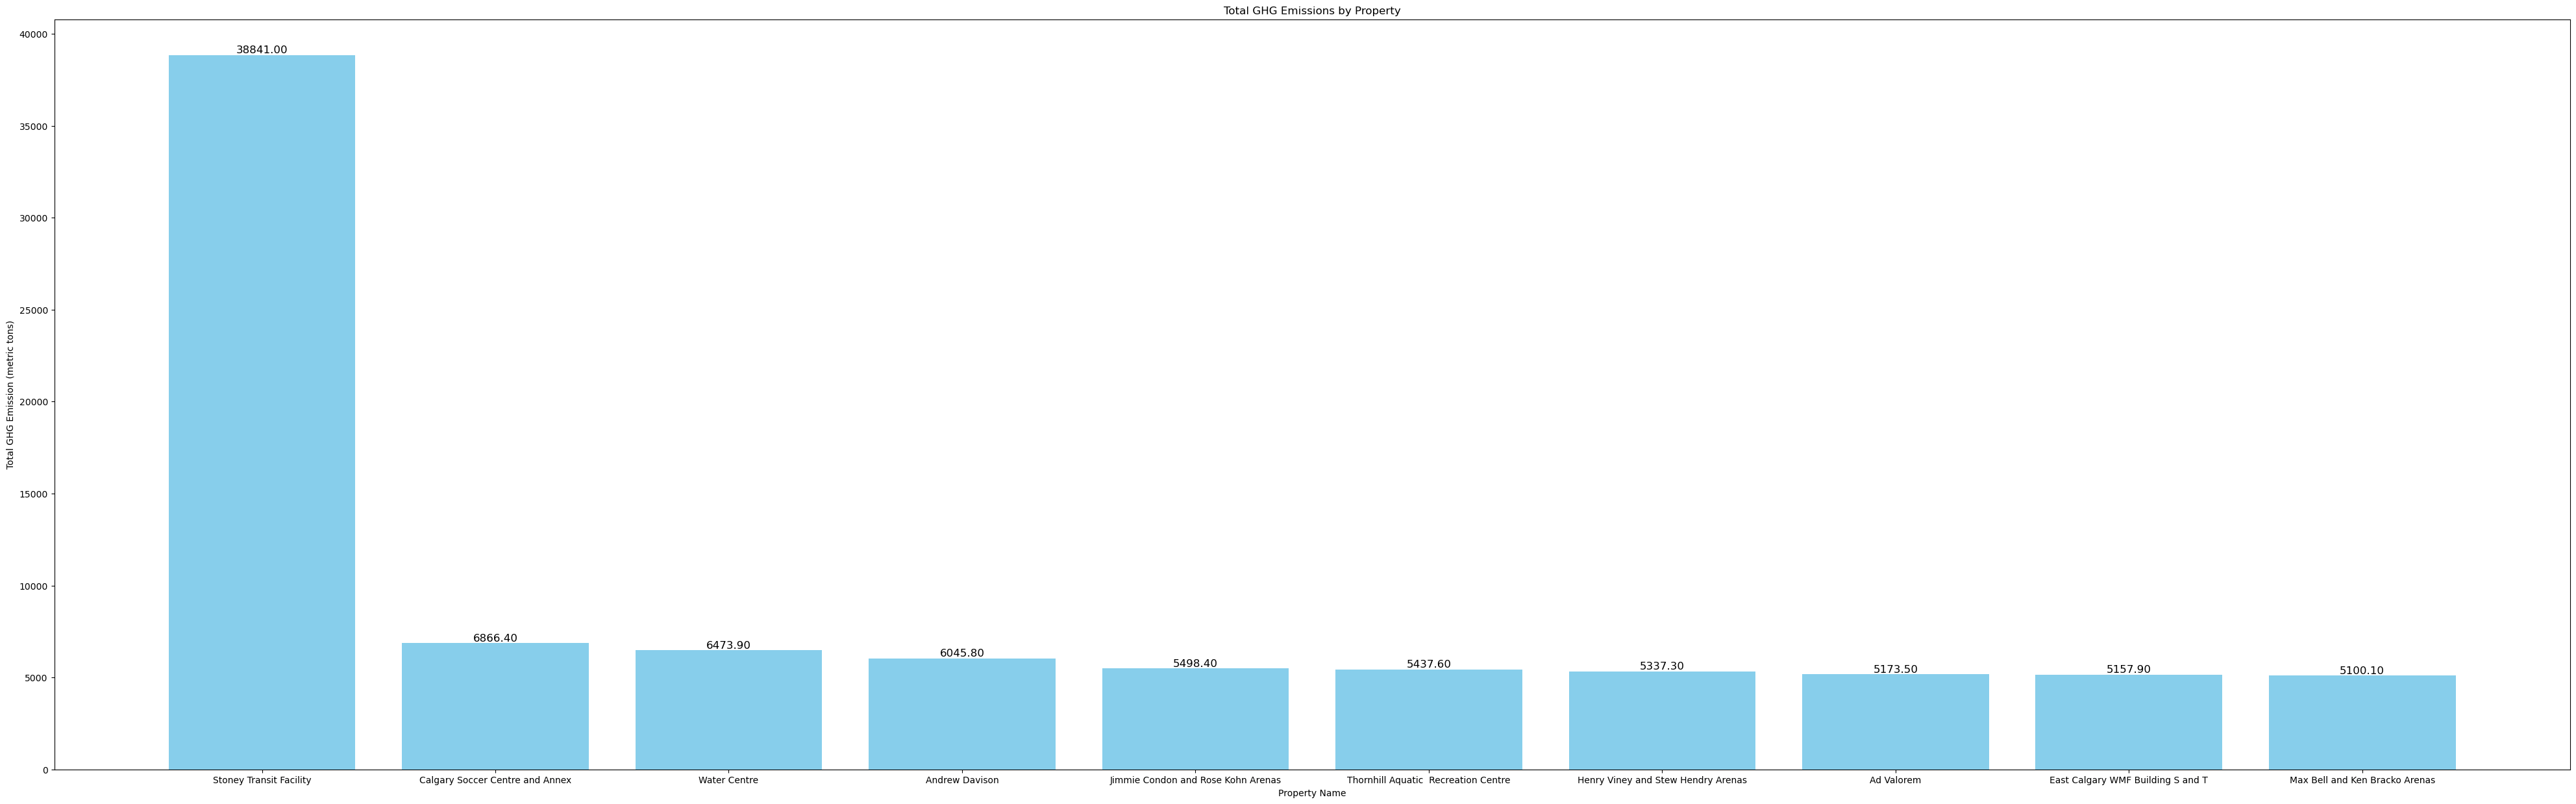

In [49]:
#dataframe containing the grouped data of the property name and total emission intensity 
emissions_by_building = pd.DataFrame(energy_data_filled.groupby('Property Name')['Total GHG Emissions (Metric Tons CO2e)'].sum().sort_values(ascending = False))
display(emissions_by_building)

#creating a bar chart with the 10 properties with the highest total emission intensity 
x = emissions_by_building.index[:10]
y = emissions_by_building['Total GHG Emissions (Metric Tons CO2e)'][:10]
plt.figure(figsize=(50, 15))
bars = plt.bar(x, y, color='skyblue')
#annotating the bars of the bar chart
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{bar.get_height():.2f}', ha='center', va='bottom', fontsize=12)
plt.title("Total GHG Emissions by Property")
plt.xlabel("Property Name")
plt.ylabel("Total GHG Emission (metric tons)")
plt.show()

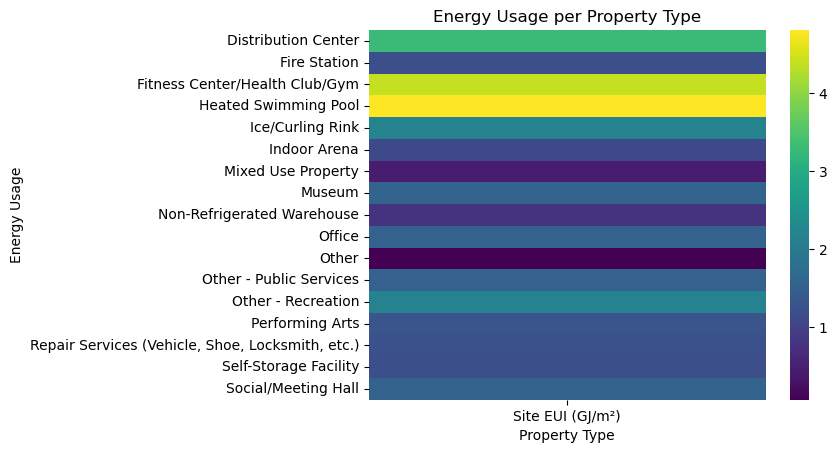

In [51]:
#pivot table with the property type as an index and the site EUI as the values
energy_usage_pivot = energy_data_filled.pivot_table(index = 'Primary Property Type - Self Selected', values = 'Site EUI (GJ/m²)', aggfunc = 'mean')

#creating a heatmap 
sns.heatmap(energy_usage_pivot, cbar=True, cmap='viridis')
plt.xlabel('Property Type')  # Update x-axis label
plt.ylabel('Energy Usage')  # Update y-axis label
plt.title('Energy Usage per Property Type')
plt.show()

In [53]:
#creating a correlation matrix between the building size, energy use and the total emission
energy_data_filled[['Property GFA - Self-Reported (m²)','Site Energy Use (GJ)','Total GHG Emissions (Metric Tons CO2e)']].corr(method = 'pearson')

,Property GFA - Self-Reported (m²),Site Energy Use (GJ),Total GHG Emissions (Metric Tons CO2e)
Property GFA - Self-Reported (m²),1.000000,0.725977,0.478433
Site Energy Use (GJ),0.725977,1.000000,0.756761
Total GHG Emissions (Metric Tons CO2e),0.478433,0.756761,1.000000


In [55]:
stats.ttest_ind(a= energy_data_filled.loc[energy_data_filled['Primary Property Type - Self Selected'] == 'Office','Site Energy Use (GJ)'],
                b= energy_data_filled.loc[energy_data_filled['Primary Property Type - Self Selected'] == 'Fitness Center/Health Club/Gym','Site Energy Use (GJ)'],
                equal_var=False) #T-test 

TtestResult(statistic=-2.916680475177676, pvalue=0.005237680754952691, df=51.281434027389494)

The results of the t-test show a p-value of 0.005 which is less than 5% and thus we would reject the null hypothesis. In this case, the null hypothesis would be the average annual energy use of Office and Fitness Center property type being equal. Therefore, the alternative which is the average annual energy use would be different.